# Pheno_Woody_Colored

In [90]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from scipy import stats

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Open file and load data

In [92]:
# load csv file
original_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/herb flower data/pheno_woody/Pheno_Woody_Colored_Lvs_GT6Yrs.csv')

In [93]:
# create a copy of data
df = original_data.copy()

In [94]:
# view the first few entries of the data
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY
0,Acer,saccharum,2,Home,ME,2011,294.750000
1,Acer,saccharum,2,Home,ME,2012,290.555556
2,Acer,saccharum,2,Home,ME,2013,282.045455
3,Acer,saccharum,2,Home,ME,2014,279.818182
4,Acer,saccharum,2,Home,ME,2015,290.761905


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genus      4600 non-null   object 
 1   Species    4600 non-null   object 
 2   Site_ID    4600 non-null   int64  
 3   Site_Name  4600 non-null   object 
 4   State      4600 non-null   object 
 5   Year       4600 non-null   int64  
 6   DOY        4600 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 251.7+ KB


## List of unique Genera

In [96]:
genus_list = df['Genus'].unique()

print(len(genus_list), 'unique genera:')
print(genus_list)

56 unique genera:
['Acer' 'Amelanchier' 'Betula' 'Forsythia' 'Fraxinus' 'Hamamelis' 'Ilex'
 'Magnolia' 'Prunus' 'Quercus' 'Rhamnus' 'Tilia' 'Juglans' 'Cornus'
 'Fagus' 'Malus' 'Cercis' 'Carya' 'Lindera' 'Liquidambar' 'Liriodendron'
 'Nyssa' 'Sassafras' 'Ulmus' 'Viburnum' 'Populus' 'Toxicodendron' 'Ostrya'
 'Cephalanthus' 'Vaccinium' 'Alnus' 'Symphoricarpos' 'Rhus' 'Corylus'
 'Celtis' 'Aruncus' 'Spiraea' 'Gleditsia' 'Robinia' 'Berberis' 'Lonicera'
 'Aesculus' 'Halesia' 'Poncirus' 'Rosa' 'Ginkgo' 'Platanus' 'Diospyros'
 'Carpinus' 'Oxydendrum' 'Gaylussacia' 'Morella' 'Salix' 'Pyrus' 'Asimina'
 'Sorbus']


## List of unique Species

In [97]:
specie_list = df['Species'].unique()

print(len(specie_list), 'unique species:')
print(specie_list)

91 unique species:
['saccharum' 'arborea' 'papyrifera' 'spp.' 'americana' 'virginiana'
 'verticillata' 'stellata' 'serotina' 'rubra' 'velutina' 'cathartica'
 'platanoides' 'rubrum' 'canadensis' 'nigra' 'florida-appalachianspring'
 'grandifolia' 'florida' 'pumila' 'macrocarpa' 'lenta' 'glabra' 'benzoin'
 'styraciflua' 'tulipifera' 'sylvatica' 'albidum' 'acerifolium' 'dentatum'
 'prunifolium' 'balsamifera' 'alba' 'radicans' 'negundo' 'alnifolia'
 'tremuloides' 'sericea' 'occidentalis' 'corymbosum' 'incana'
 'alleghaniensis' 'albus' 'lantanoides' 'racemosa' 'saccharinum' 'dioicus'
 'vanhouttei' 'triacanthos' 'deltoides' 'palustris' 'cordiformis'
 'pseudoacacia' 'uliginosum' 'thunbergii' 'maackii' 'alternifolia'
 'morrowii' 'pavia' 'kousa' 'carolina' 'trifoliata' 'rugosa'
 'pensylvanicum' 'spicatum' 'biloba' 'grandiflora-autumnbrilliance'
 'tripetala' 'yedoensis' 'imbricaria' 'caroliniana' 'fraseri' 'arboreum'
 'baccata' 'pensylvanica' 'ilicifolia' 'angustifolium' 'maritima'
 'discolor' 'f

## List of unique site names

In [98]:
site_list = df['Site_Name'].unique()

print(len(site_list), 'unique site names:')
print(site_list)

177 unique site names:
['Home' 'Cedar Bog Lake Lowland 2' 'PPN_200228' 'PPN_305711' 'PPN_9200010'
 'PPN_9239908' 'my back yard' 'my NE side yard' 'backyard'
 'my community garden' 'front flower bed' 'Spicebush Trail' 'back yard'
 'Cary Institute PSB' 'Bridge Trail' 'Ridge Trail' 'My NW side yard'
 'Beckman Lake Bog (Cedar Creek LTER)'
 'Beckman Lake Highland (Cedar Creek LTER)'
 'PhenoCAM tower (Cedar Creek LTER)' 'MEF S2' 'MEF S4'
 'South of garden terraces' 'NADP' 'My holler' 'Mirror Lake - NBG'
 'VA Natives Garden - NBG' 'Enchanted Forest - NBG' 'First Meadow'
 'Big Meadow North' 'Cedar Bog Lake Highland 2' 'Schoodic Institute'
 'My yard' 'Flagstaff Lake' 'Cedar Bog Lake Highland 1'
 'Cedar Bog Lake Lowland 1' 'UMCE-KL'
 'Rachel Carson National Wildlife Refuge:  Headquarters'
 'Saratoga Battlefield' 'Michigan house' 'Burlingham west' 'front yard'
 ' Victory Woods' 'my yard' 'home backyard' 'Powhite Park'
 'Marist Chicago' 'Lisburn Road (PA)' 'Square Ledge (SQL1)' 'home'
 "Sue's site

# Form groupings based on unique categorizations of location, specie, genus

In [99]:
# create a new column to capture the categories the entry pertains to
categories = []
for ind in df.index:
  category = (df['Site_Name'][ind], df['Species'][ind], df['Genus'][ind])
  categories.append(category)
df['categories'] = categories

In [100]:
# view the new column
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,saccharum,2,Home,ME,2011,294.750000,"(Home, saccharum, Acer)"
1,Acer,saccharum,2,Home,ME,2012,290.555556,"(Home, saccharum, Acer)"
2,Acer,saccharum,2,Home,ME,2013,282.045455,"(Home, saccharum, Acer)"
3,Acer,saccharum,2,Home,ME,2014,279.818182,"(Home, saccharum, Acer)"
4,Acer,saccharum,2,Home,ME,2015,290.761905,"(Home, saccharum, Acer)"


In [101]:
category_list = df.categories.unique()
print('There are',len(category_list),'unique groupings of genus, specie, and site')

There are 555 unique groupings of genus, specie, and site


## Map each grouping to the subset of data that it consists of

In [102]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# # for each category group observed in df, map the associated data to the category group
for category in category_list:

  criteria1 = df['Site_Name'] == category[0]
  criteria2 = df['Species'] == category[1]
  criteria3 = df['Genus'] == category[2]

  categorized_data.update({category:df[criteria1 & criteria2 & criteria3]})



## Visualize an Example

In [103]:
# view data associated with a given category group
example_data = categorized_data.get(('Home', 'saccharum', 'Acer'))

# you can look up different category groups by editing the above line of code, inside of the .get() function provide your categories as follows:
# ('Site','specie', 'genera')


In [104]:
# view example dataset
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,saccharum,2,Home,ME,2011,294.750000,"(Home, saccharum, Acer)"
1,Acer,saccharum,2,Home,ME,2012,290.555556,"(Home, saccharum, Acer)"
2,Acer,saccharum,2,Home,ME,2013,282.045455,"(Home, saccharum, Acer)"
3,Acer,saccharum,2,Home,ME,2014,279.818182,"(Home, saccharum, Acer)"
4,Acer,saccharum,2,Home,ME,2015,290.761905,"(Home, saccharum, Acer)"
5,Acer,saccharum,2,Home,ME,2016,276.500000,"(Home, saccharum, Acer)"
6,Acer,saccharum,2,Home,ME,2017,298.461539,"(Home, saccharum, Acer)"
7,Acer,saccharum,2,Home,ME,2018,273.809524,"(Home, saccharum, Acer)"
8,Acer,saccharum,2,Home,ME,2019,265.250000,"(Home, saccharum, Acer)"
9,Acer,saccharum,2,Home,ME,2020,276.916667,"(Home, saccharum, Acer)"


<Axes: xlabel='Year', ylabel='DOY'>

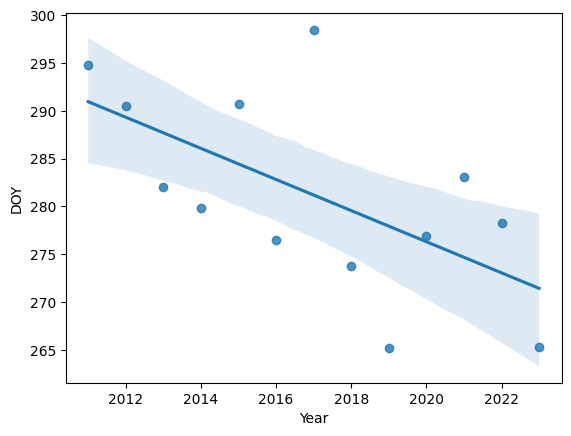

In [105]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['DOY'])

## Calculte Pearson correlation coefficient

In [106]:
x=example_data['Year']
y=example_data['DOY']

round(x.corr(y),4)

-0.6144

## Perform regression and calculate relevant stats for all 555 unique groupings


In [107]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
observations = []
results2 = []

# loop through all unique catgory groupings
for category in category_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(est2.params) >= 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))
  observations.append(len(example_data['Year']))


correlation_df = pd.DataFrame({
    'grouping':category_groups,
    'observations':observations,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


In [108]:
# drop all rows containing NaN values (these seem to usually result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view catergories & correlation
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

                                                                             grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
0                                                             (Home, saccharum, Acer)            13    -0.6144    -0.4103  -1.6268  0.3775   0.0171
1                                                        (Home, arborea, Amelanchier)            12    -0.7262    -0.4848  -2.3747  0.5274   0.0056
2                                                          (Home, papyrifera, Betula)            13    -0.7368    -0.6154  -2.6714  0.5429   0.0029
3                                                             (Home, spp., Forsythia)            12     0.1924     0.1818   0.9454  0.0370   0.6113
4                                                         (Home, americana, Fraxinus)             9    -0.4111    -0.3889  -1.9183  0.1690   0.2423
5                                                       (Home, virginiana, Hamamelis)            12    -0.6575  

In [109]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,545.0,8.418349,1.905206,3.0000,7.0000,8.0000,10.0000,13.0000
Pearson r,545.0,-0.056992,0.431117,-0.9523,-0.3920,-0.0466,0.2587,0.8943
Kendall τ,545.0,-0.043616,0.321116,-0.9048,-0.2381,-0.0556,0.1556,0.7857
R²,545.0,0.188767,0.206259,0.0000,0.0225,0.1036,0.2929,0.9069
p-value,545.0,0.442074,0.304072,0.0015,0.1660,0.4078,0.7134,0.9995


# Let's reduce our results to groupings that saw a p-value < .1
## Sorted by p-value


In [110]:
significant = correlation_df[correlation_df['p-value']<.10].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

                                                            grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
7                                         (Home, stellata, Magnolia)             8    -0.9106    -0.8571  -5.1171  0.8292   0.0015
2                                         (Home, papyrifera, Betula)            13    -0.7368    -0.6154  -2.6714  0.5429   0.0029
422                                   (Hickory Route, glabra, Carya)             8    -0.8825    -0.7857  -4.3426  0.7789   0.0032
407                   (Ecology Phenology Project, platanoides, Acer)             6    -0.9523    -0.7333 -28.7843  0.9069   0.0033
339                (Huyck Preserve Falls Trail, americana, Fraxinus)             8     0.8943     0.7143   2.6259  0.7997   0.0035
24                                  (my NE side yard, pumila, Malus)            12    -0.7634    -0.4545 -10.1644  0.5827   0.0036
11                                       (Home, cathartica, Rhamnus)             9 

### Descriptive Statistics of Instance with p-value < .10:

In [111]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,91.0,8.362637,1.963650,5.0000,7.00000,8.0000,9.00000,13.0000
Pearson r,91.0,-0.316004,0.673203,-0.9523,-0.78850,-0.6668,0.62825,0.8943
Kendall τ,91.0,-0.266725,0.502887,-0.9048,-0.61720,-0.4286,0.14445,0.7857
R²,91.0,0.548073,0.144166,0.2492,0.43675,0.5429,0.64540,0.9069
p-value,91.0,0.041113,0.028400,0.0015,0.01670,0.0387,0.05855,0.0965


## Now let's break them down by slope...
#Positive Slope:

In [112]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.to_string())

                                                            grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
127                  (Cedar Bog Lake Highland 2, papyrifera, Betula)            13     0.7035     0.5641   1.3311  0.4948   0.0132
87    (Beckman Lake Highland (Cedar Creek LTER), papyrifera, Betula)            13     0.6449     0.4872   1.3942  0.4160   0.0280
475                                      (Phudd Hill , rubrum, Acer)             7     0.8485     0.7143   1.5566  0.7200   0.0221
542               (SCBI_060.phenology.phe - primary, nigra, Juglans)             8     0.7656     0.5714   1.7334  0.5861   0.0356
68                                  (Bridge Trail, serotina, Prunus)            10     0.6069     0.2889   1.9536  0.3683   0.0800
129                (Cedar Bog Lake Highland 2, tremuloides, Populus)            12     0.7447     0.5738   1.9999  0.5546   0.0083
438                                    (Site G, ilicifolia, Quercus)             8 

### Descriptive Statistics of Positively Sloped Instances:

In [113]:
positive_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,26.0,8.730769,2.011123,6.0000,8.00000,8.00000,9.000000,13.0000
Pearson r,26.0,0.731308,0.079691,0.6069,0.66320,0.73755,0.774600,0.8943
Kendall τ,26.0,0.464835,0.236129,-0.1667,0.42860,0.51190,0.573200,0.7857
R²,26.0,0.540900,0.118049,0.3683,0.43980,0.54400,0.599975,0.7997
p-value,26.0,0.044335,0.028382,0.0035,0.01815,0.04800,0.064000,0.0952


# Negative Slope:

In [114]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.to_string())

                                                     grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
407            (Ecology Phenology Project, platanoides, Acer)             6    -0.9523    -0.7333 -28.7843  0.9069   0.0033
411               (Ecology Phenology Project, rubra, Quercus)             7    -0.7609    -0.3333 -20.7002  0.5789   0.0461
501                                   (Backyard, spp., Malus)             6    -0.8048    -0.7333 -19.8424  0.6477   0.0527
268                 (Teatown Lake Reservation, alba, Quercus)             9    -0.6103    -0.3333 -11.5663  0.3724   0.0783
24                           (my NE side yard, pumila, Malus)            12    -0.7634    -0.4545 -10.1644  0.5827   0.0036
264            (Teatown Lake Reservation, grandifolia, Fagus)            10    -0.5561    -0.2889  -9.2551  0.3093   0.0912
511                            (Shrub Route, nudum, Viburnum)             7    -0.8075    -0.5238  -9.2189  0.6521   0.0266
494     

### Descriptive Statistics of Negatively Sloped Instances:

In [115]:
negative_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,65.0,8.215385,1.940460,5.0000,7.0000,8.0000,9.0000,13.0000
Pearson r,65.0,-0.734929,0.104858,-0.9523,-0.8065,-0.7368,-0.6575,-0.4992
Kendall τ,65.0,-0.559349,0.171672,-0.9048,-0.7143,-0.5714,-0.4286,-0.2143
R²,65.0,0.550942,0.154124,0.2492,0.4324,0.5429,0.6505,0.9069
p-value,65.0,0.039825,0.028525,0.0015,0.0163,0.0381,0.0567,0.0965


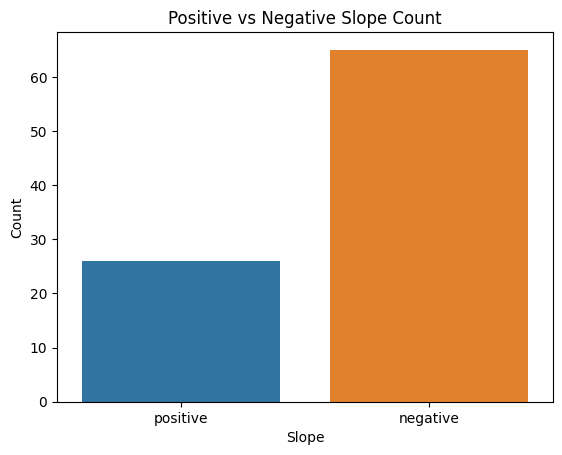

Number of positive slope examples: 26
Number of negative slope examples: 65


In [116]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 91, out of the original 545, groupings showed a statistically significant (p < .10) relationship between year and First_Yes_DOY
##26 have a positive slope
##65 have a negative slope